In [ ]:
import keras
keras.__version__

'2.12.0'

In [ ]:
# !pip uninstall keras
# !pip install keras==2.12

Found existing installation: keras 2.15.0
Uninstalling keras-2.15.0:
  Would remove:
    /usr/local/lib/python3.10/dist-packages/keras-2.15.0.dist-info/*
    /usr/local/lib/python3.10/dist-packages/keras/*
Proceed (Y/n)? 
  Successfully uninstalled keras-2.15.0
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 10.3 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.15.0 requires keras<2.16,>=2.15.0, but you have keras 2.12.0 which is incompatible.


In [ ]:
!pip install keras_vggface

In [ ]:
!pip install keras_applications

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 1.6 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import random
import cv2
import os
import tensorflow as tf
from google.colab import drive
from sklearn.model_selection import train_test_split
from tensorflow.keras.datasets.cifar10 import load_data
from tensorflow.keras.utils import to_categorical, load_img, img_to_array
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model, Sequential                       # Functional API 사용 예정.
from tensorflow.keras.layers import Dense, Dropout, Flatten, Input, Conv2D, MaxPooling2D, BatchNormalization, Activation, ZeroPadding2D
from tensorflow.keras.preprocessing import sequence, image_dataset_from_directory
from tensorflow.keras.models import Sequential
from tensorflow.keras.datasets.cifar10 import load_data
from tensorflow.keras.applications import mobilenet             # 비교적 작은 크기의 모형.
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam, RMSprop, SGD
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# from deepface.basemodels import VGGFace
warnings.filterwarnings('ignore')                               # Turn the warnings off.
%matplotlib inline

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
os.chdir('/content/drive/MyDrive/TensorFlow/99. Project/Face_Predict')

In [ ]:
from keras_vggface.vggface import VGGFace

In [ ]:
train_race_datagen = ImageDataGenerator()
test_race_datagen = ImageDataGenerator()

In [ ]:
len(os.listdir('./Train/Race/Black/')) + len(os.listdir('./Train/Race/White')) + len(os.listdir('./Train/Race/Asian'))

8399

In [ ]:
train_race_generator = train_race_datagen.flow_from_directory(
    './Train/Race',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

test_race_generator = test_race_datagen.flow_from_directory(
    './Test/Race',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

Found 8399 images belonging to 3 classes.
Found 1876 images belonging to 3 classes.


In [ ]:
train_race_generator.class_indices

{'Asian': 0, 'Black': 1, 'White': 2}

In [ ]:
test_race_generator.class_indices

{'Asian': 0, 'Black': 1, 'White': 2}

In [ ]:
!ls -l

total 755598
drwx------ 2 root root      4096 Mar 21 04:57 Age
-rw------- 1 root root  52110255 Mar 21 05:03 Age.zip
drwx------ 2 root root      4096 Mar 18 08:41 Code
-rw------- 1 root root   1060692 Mar 18 05:25 data01.csv
-rw------- 1 root root    169233 Mar 21 00:56 data01_undersampled_20.csv
-rw------- 1 root root    502954 Mar 21 00:44 data01_undersampled.csv
-rw------- 1 root root        66 Mar 18 00:39 kaggle.json
drwx------ 3 root root      4096 Mar 18 14:24 keras_vggface
-rw------- 1 root root    470357 Mar 14 07:00 sample01.ipynb
-rw------- 1 root root     89325 Mar 14 08:24 sample02.ipynb
drwx------ 3 root root      4096 Mar 21 01:13 Test
drwx------ 2 root root      4096 Mar 21 09:51 Test_20
drwx------ 3 root root      4096 Mar 21 01:14 Train
drwx------ 2 root root      4096 Mar 21 09:51 Train_20
-rw------- 1 root root  34253632 Mar 21 01:00 Train_Test_20.zip
-rw------- 1 root root 104955102 Mar 21 01:01 Train_Test_All.zip
drwx------ 2 root root      4096 Mar 18 00:42 UTKFa

In [ ]:
vggface = VGGFace(model='vgg16', include_top=False, input_shape=(224, 224, 3),
                  pooling='avg')

58909280/58909280 [==============================] - 0s 0us/step


In [ ]:
vggface.trainable = False

In [ ]:
vggface.summary()

Model: "vggface_vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1_1 (Conv2D)            (None, 224, 224, 64)      1792      
                                                                 
 conv1_2 (Conv2D)            (None, 224, 224, 64)      36928     
                                                                 
 pool1 (MaxPooling2D)        (None, 112, 112, 64)      0         
                                                                 
 conv2_1 (Conv2D)            (None, 112, 112, 128)     73856     
                                                                 
 conv2_2 (Conv2D)            (None, 112, 112, 128)     147584    
                                                                 
 pool2 (MaxPooling2D)        (None, 56, 56, 128)     

In [ ]:
output_layer = vggface.get_layer('pool5').output
x = Flatten(name='Flatten')(output_layer)
x = Dense(units=512, activation='relu', name='Dense-1')(x)

x = Dropout(rate=0.5, name='Dropout-1')(x)
x = Dense(units=256, activation='relu', name='Dense-2')(x)

x = Dense(units=3, activation='softmax', name='Output')(x)

model_race = Model(inputs=vggface.input, outputs=x)

In [ ]:
model_race.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1_1 (Conv2D)            (None, 224, 224, 64)      1792      
                                                                 
 conv1_2 (Conv2D)            (None, 224, 224, 64)      36928     
                                                                 
 pool1 (MaxPooling2D)        (None, 112, 112, 64)      0         
                                                                 
 conv2_1 (Conv2D)            (None, 112, 112, 128)     73856     
                                                                 
 conv2_2 (Conv2D)            (None, 112, 112, 128)     147584    
                                                                 
 pool2 (MaxPooling2D)        (None, 56, 56, 128)       0     

In [ ]:
# Hyperparameters.
n_epochs = 200
batch_size = 32
learn_rate = 0.0001

In [ ]:
optimizer = Adam(learning_rate=learn_rate)
model_race.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [ ]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
check_point = ModelCheckpoint(filepath='./Code/CheckPoint/race_{epoch:02d}_{val_loss:.3f}.h5',
                              monitor='val_loss', verbose=1, save_best_only=True, mode='min')

In [ ]:
summary = model_race.fit_generator(train_race_generator,
                                   steps_per_epoch=8399 // batch_size,
                                   epochs=n_epochs,
                                   validation_data=test_race_generator,
                                   verbose=1, callbacks=[early_stop, check_point])

Epoch 1/200
262/262 [==============================] - ETA: 0s - loss: 0.5810 - accuracy: 0.8257
Epoch 1: val_loss improved from inf to 0.38406, saving model to ./Code/CheckPoint/race_01_0.384.h5
262/262 [==============================] - 49s 182ms/step - loss: 0.5810 - accuracy: 0.8257 - val_loss: 0.3841 - val_accuracy: 0.9136
Epoch 2/200
262/262 [==============================] - ETA: 0s - loss: 0.4545 - accuracy: 0.8629
Epoch 2: val_loss improved from 0.38406 to 0.38385, saving model to ./Code/CheckPoint/race_02_0.384.h5
262/262 [==============================] - 46s 175ms/step - loss: 0.4545 - accuracy: 0.8629 - val_loss: 0.3839 - val_accuracy: 0.9238
Epoch 3/200
262/262 [==============================] - ETA: 0s - loss: 0.3574 - accuracy: 0.8860
Epoch 3: val_loss improved from 0.38385 to 0.32739, saving model to ./Code/CheckPoint/race_03_0.327.h5
262/262 [==============================] - 47s 177ms/step - loss: 0.3574 - accuracy: 0.8860 - val_loss: 0.3274 - val_accuracy: 0.9328
Ep

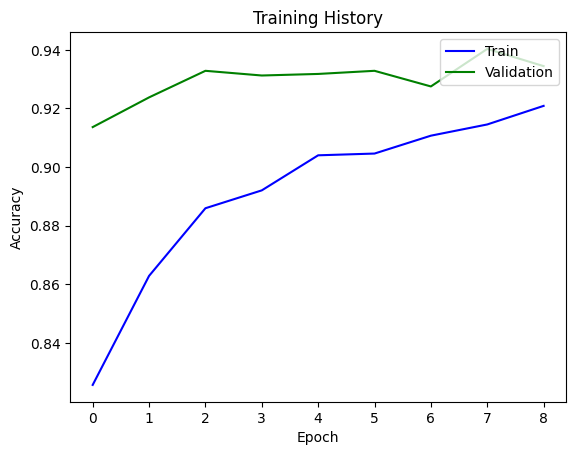

In [ ]:
# 학습 history 출력.
n_skip = 0                 # Skip the first few steps.
plt.plot(summary.history['accuracy'][n_skip:], c="b")
plt.plot(summary.history['val_accuracy'][n_skip:], c="g")
plt.title('Training History')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [ ]:
# 최종적으로 정확도 계산.
ACC = model_race.evaluate(test_race_generator, verbose=0)[1]
print("Test Accuracy : {}".format(np.round(ACC, 3)))

Test Accuracy : 0.934
